In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import random

In [2]:
train_filepath = 'data/train.csv'
traindata = pd.read_table(train_filepath)
traindata.insert(3, "Problem Unit", traindata.apply(lambda row: row["Problem Hierarchy"].split(',')[0].strip(), axis=1))
traindata.insert(4, "Problem Section", traindata.apply(lambda row: row["Problem Hierarchy"].split(',')[1].strip(), axis=1))

FileNotFoundError: [Errno 2] No such file or directory: 'data/train.csv'

In [ ]:
traindata.columns

Index(['Row', 'Anon Student Id', 'Problem Hierarchy', 'Problem Name',
       'Problem View', 'Step Name', 'Step Start Time',
       'First Transaction Time', 'Correct Transaction Time', 'Step End Time',
       'Step Duration (sec)', 'Correct Step Duration (sec)',
       'Error Step Duration (sec)', 'Correct First Attempt', 'Incorrects',
       'Hints', 'Corrects', 'KC(Default)', 'Opportunity(Default)'],
      dtype='object')

In [ ]:
# Inspect some of the training data
traindata.head()

,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default)
0,9938,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP04,1,R1C1,2005-09-09 12:23:34.0,2005-09-09 12:24:07.0,2005-09-09 12:24:07.0,2005-09-09 12:24:07.0,33.0,33.0,NaN,1,0,0,1,NaN,NaN
1,9939,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP04,1,R1C2,2005-09-09 12:24:07.0,2005-09-09 12:24:22.0,2005-09-09 12:24:22.0,2005-09-09 12:24:22.0,15.0,15.0,NaN,1,0,0,1,NaN,NaN
2,9940,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP04,1,R3C1,2005-09-09 12:24:22.0,2005-09-09 12:25:16.0,2005-09-09 12:25:40.0,2005-09-09 12:25:40.0,78.0,NaN,78.0,0,2,0,1,Define Variable,1
3,9941,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP04,1,R3C2,2005-09-09 12:25:40.0,2005-09-09 12:25:51.0,2005-09-09 12:27:24.0,2005-09-09 12:27:24.0,104.0,NaN,104.0,0,4,9,1,"Using small numbers~~Write expression, positiv...",1~~1~~1
4,9942,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP04,1,R4C1,2005-09-09 12:27:24.0,2005-09-09 12:27:30.0,2005-09-09 12:27:30.0,2005-09-09 12:27:30.0,6.0,6.0,NaN,1,0,0,1,Entering a given,1


In [ ]:
csd1 = traindata['Problem Unit']
csd1.describe()

count    181599.000000
mean         17.924024
std          35.179534
min           0.000000
25%           5.000000
50%           8.000000
75%          17.000000
max        1067.000000
Name: Correct Step Duration (sec), dtype: float64

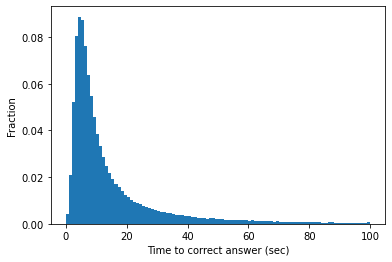

In [ ]:
%matplotlib inline
hist = plt.hist(np.array(csd1.dropna()),bins=32,density=True,log=False,range=(0,32))
plt.xticks(color='w')
plt.xlabel('Problem Unit')
plt.ylabel('Fraction')
plt.show()

In [ ]:
csd2 = traindata['Problem Section']
csd2.describe()

In [ ]:
%matplotlib inline
hist = plt.hist(np.array(csd2.dropna()),bins=138,density=True,log=False,range=(0,138))
plt.xticks(color='w')
plt.xlabel('Problem Section')
plt.ylabel('Fraction')
plt.show()

In [ ]:
csd3 = traindata['Problem View']
csd3.describe()

In [ ]:
%matplotlib inline
hist = plt.hist(np.array(csd3.dropna()),bins=10,density=True,log=False,range=(0,20))
plt.xlabel('Problem View')
plt.ylabel('Fraction')
plt.show()

In [ ]:
csd4 = traindata['Step Duration (sec)']
csd4.describe()

In [ ]:
%matplotlib inline
hist = plt.hist(np.array(csd4.dropna()),bins=100,density=True,log=False,range=(0,100))
plt.xlabel('Step Duration')
plt.ylabel('Fraction')
plt.show()

In [ ]:
csd5 = traindata['Correct Step Duration (sec)']
csd5.describe()

In [ ]:
%matplotlib inline
hist = plt.hist(np.array(csd5.dropna()),bins=100,density=True,log=False,range=(0,100))
plt.xlabel('Correct Step Duration')
plt.ylabel('Fraction')
plt.show()

In [ ]:
csd6 = traindata['Error Step Duration (sec)']
csd6.describe()

In [ ]:
%matplotlib inline
hist = plt.hist(np.array(csd6.dropna()),bins=200,density=True,log=False,range=(0,200))
plt.xlabel('Error Step Duration')
plt.ylabel('Fraction')
plt.show()

In [ ]:
csd7 = traindata['Correct First Attempt']
csd7.describe()

In [ ]:
%matplotlib inline
hist = plt.hist(np.array(csd7.dropna()),bins=2,density=True,log=False,range=(0,2))
plt.xlabel('Correct First Attempt')
plt.ylabel('Fraction')
plt.show()